In [ ]:
import os
import json
import pandas as pd

def load_all_json_from_subfolders(base_path="./json_metrics"):
    all_data = []

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith(".json"):
                full_path = os.path.join(root, file)
                try:
                    with open(full_path, "r", encoding="utf-8") as f:
                        data = json.load(f)
                        all_data.append(data)
                except Exception as e:
                    print(f"❌ Failed to load {full_path}: {e}")

    return pd.DataFrame(all_data)

df = load_all_json_from_subfolders()
output_path = os.path.join("./json_metrics", "results.json")
df.to_json(output_path, orient="records", indent=2, force_ascii=False)

print(f"✅ Saved merged results to {output_path}")

✅ Saved merged results to ./json_metrics/results.json


✅ Total records loaded: 685
                         gen_model  citation_recall  citation_precision
0            Llama-3.1-8B-Instruct        31.295182           30.570949
1           Llama-3.3-70B-Instruct        87.597810           86.226350
2         Llama3-TAIDE-LX-70B-Chat        24.270365           23.677518
3  Mistral-Small-24B-Instruct-2501        84.833139           81.168905
4                      gpt-4o-mini        86.875328           86.475839


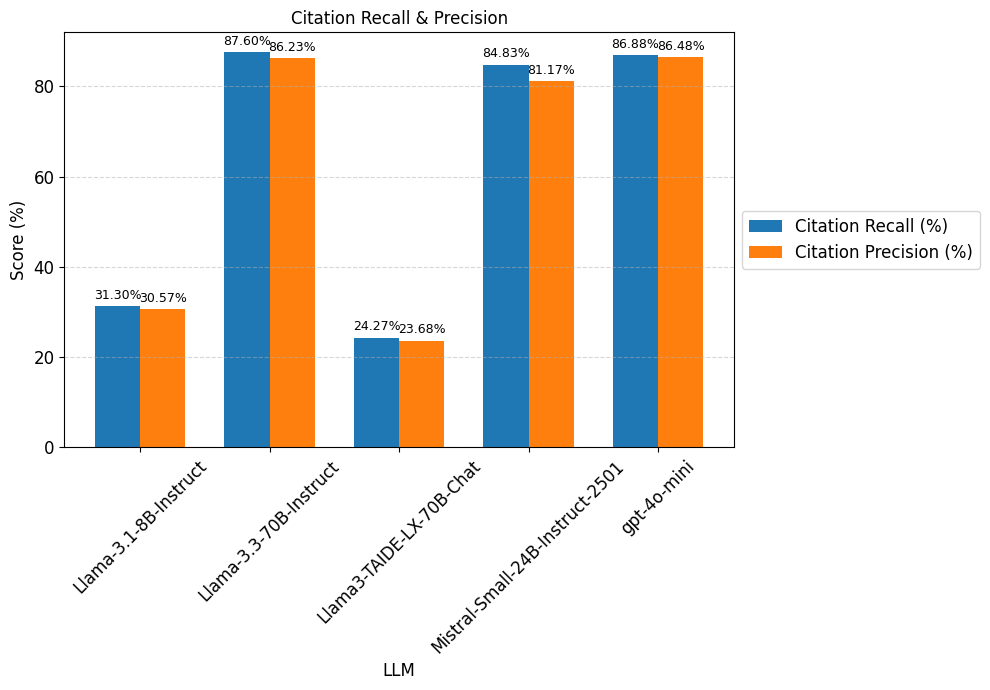

In [33]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# 載入 JSON 檔案
result_path = os.path.join("./json_metrics", "results.json")
with open(result_path, "r", encoding="utf-8") as f:
    data = json.load(f)
print("✅ Total records loaded:", len(data))

# 轉為 DataFrame，擷取欄位
df = pd.DataFrame([
    {
        "gen_model": item["gen_model"],
        "citation_recall": item["metrics"].get("citation_recall", None),
        "citation_precision": item["metrics"].get("citation_precision", None)
    }
    for item in data
])

# 轉換為數值 & 去除缺失
df["citation_recall"] = pd.to_numeric(df["citation_recall"], errors="coerce")
df["citation_precision"] = pd.to_numeric(df["citation_precision"], errors="coerce")

# 分組計算平均
grouped = df.groupby("gen_model").mean(numeric_only=True).reset_index()

# 轉換為百分比格式（乘上100）
grouped["citation_recall"] = grouped["citation_recall"] * 100
grouped["citation_precision"] = grouped["citation_precision"] * 100
print(grouped)

# 繪製長條圖
x = grouped["gen_model"]
x_pos = range(len(x))

bar_width = 0.35

plt.figure(figsize=(10, 7))
plt.bar([p - bar_width/2 for p in x_pos], grouped["citation_recall"], width=bar_width, label="Citation Recall (%)")
plt.bar([p + bar_width/2 for p in x_pos], grouped["citation_precision"], width=bar_width, label="Citation Precision (%)")

# 顯示數值（保留兩位）
for i, val in enumerate(grouped["citation_recall"]):
    plt.text(i - bar_width/2, val + 1, f"{val:.2f}%", ha='center', va='bottom', fontsize=9)
for i, val in enumerate(grouped["citation_precision"]):
    plt.text(i + bar_width/2, val + 1, f"{val:.2f}%", ha='center', va='bottom', fontsize=9)

plt.xticks(x_pos, x, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("LLM", fontsize=12)
plt.ylabel("Score (%)", fontsize=12)
plt.title("Citation Recall & Precision", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
